# Evaluating training logs

Following the training of the model, we will here evaluate the training logs, and plot the loss.

## Libraries & Setup

### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Setup

In [2]:
log_dir = "../../logs/"
# get all .csv files in log_dir
log_files = [f for f in os.listdir(log_dir) if f.endswith('.csv')]

### Data Loading

In [3]:
# read all csv files into pandas dataframes
logs = [
    pd.read_csv(os.path.join(log_dir, f)) 
    for f in log_files
]

## Evaluation

### Util Functions

In [4]:
def process_logs(raw_log_df):            
    loss_list_dict = raw_log_df["@message"].apply(lambda x: eval(x)).tolist()    
    loss_list_dict = loss_list_dict[1:]
    processed_logs = pd.DataFrame(loss_list_dict)

    # reverse the order of the rows --> from oldest to newest
    processed_logs = processed_logs.iloc[::-1]

    # we add the change in loss from the previous epoch to the dataframe
    processed_logs["loss_change"] = processed_logs["loss"].abs().diff()
    
    return processed_logs    


In [5]:
def plot_loss(loss_df, model_name, trainings_date):

    # grid plot (two plots in one)
    sns.set_theme(style="darkgrid")    

    fig, ax = plt.subplots(
        nrows=3, ncols=1, sharex=False, sharey=False,
        figsize=(23, 12)
    )

    # LOSS OVER TIME
    sns.lineplot(
        data=loss_df, x="epoch", y="loss", 
        ax=ax[0],
        label="Loss",
        color="red",
        alpha=0.5
    )
    ax[0].set_title("Loss over time (epochs)")
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")

    # LEARNING RATE OVER TIME
    sns.lineplot(
        data=loss_df, x="epoch", y="learning_rate",
        ax=ax[1],
        label="Learning rate",
        color="blue",
        alpha=0.5
    )
    ax[1].set_title("Learning rate over time (epochs)")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Learning rate")

    # CHANGE IN LOSS OVER TIME
    colors = np.where(loss_df["loss_change"] < 0, 'red', 'blue')
    sns.barplot(
        data=loss_df, x="epoch", y="loss_change",
        ax=ax[2],
        label="Loss change",
        palette=colors,    
        alpha=0.5,
        errorbar=None,
        estimator=np.sum,
    )

    # add a horizontal line at y=0
    ax[2].axhline(y=0, color="black", linestyle="-", linewidth=1, alpha=0.5)

    ax[2].set_title("Loss change over time (epochs), positive values = loss decrease")
    ax[2].set_xlabel("Epoch")
    ax[2].set_ylabel("Loss change")

    ax[2].xaxis.label.set_visible(False)
    ax[2].tick_params(axis="x", which="both", bottom=False)
    ax[2].set_xticklabels([])

    # set figure title
    fig.suptitle(f"Training results for {model_name} ({trainings_date})", fontsize=16)

    # tight layout
    fig.tight_layout()

    plt.savefig(f"../../images/results-{model_name}-{trainings_date}.png")

    plt.show()

### Plotting

/var/folders/0t/46569zhs0mng6tbft4v9wks40000gn/T/ipykernel_30596/393593786.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/0t/46569zhs0mng6tbft4v9wks40000gn/T/ipykernel_30596/393593786.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(
/var/folders/0t/46569zhs0mng6tbft4v9wks40000gn/T/ipykernel_30596/393593786.py:37: UserWarning: The palette list has more values (629) than needed (300), which may not be intended.
  sns.barplot(


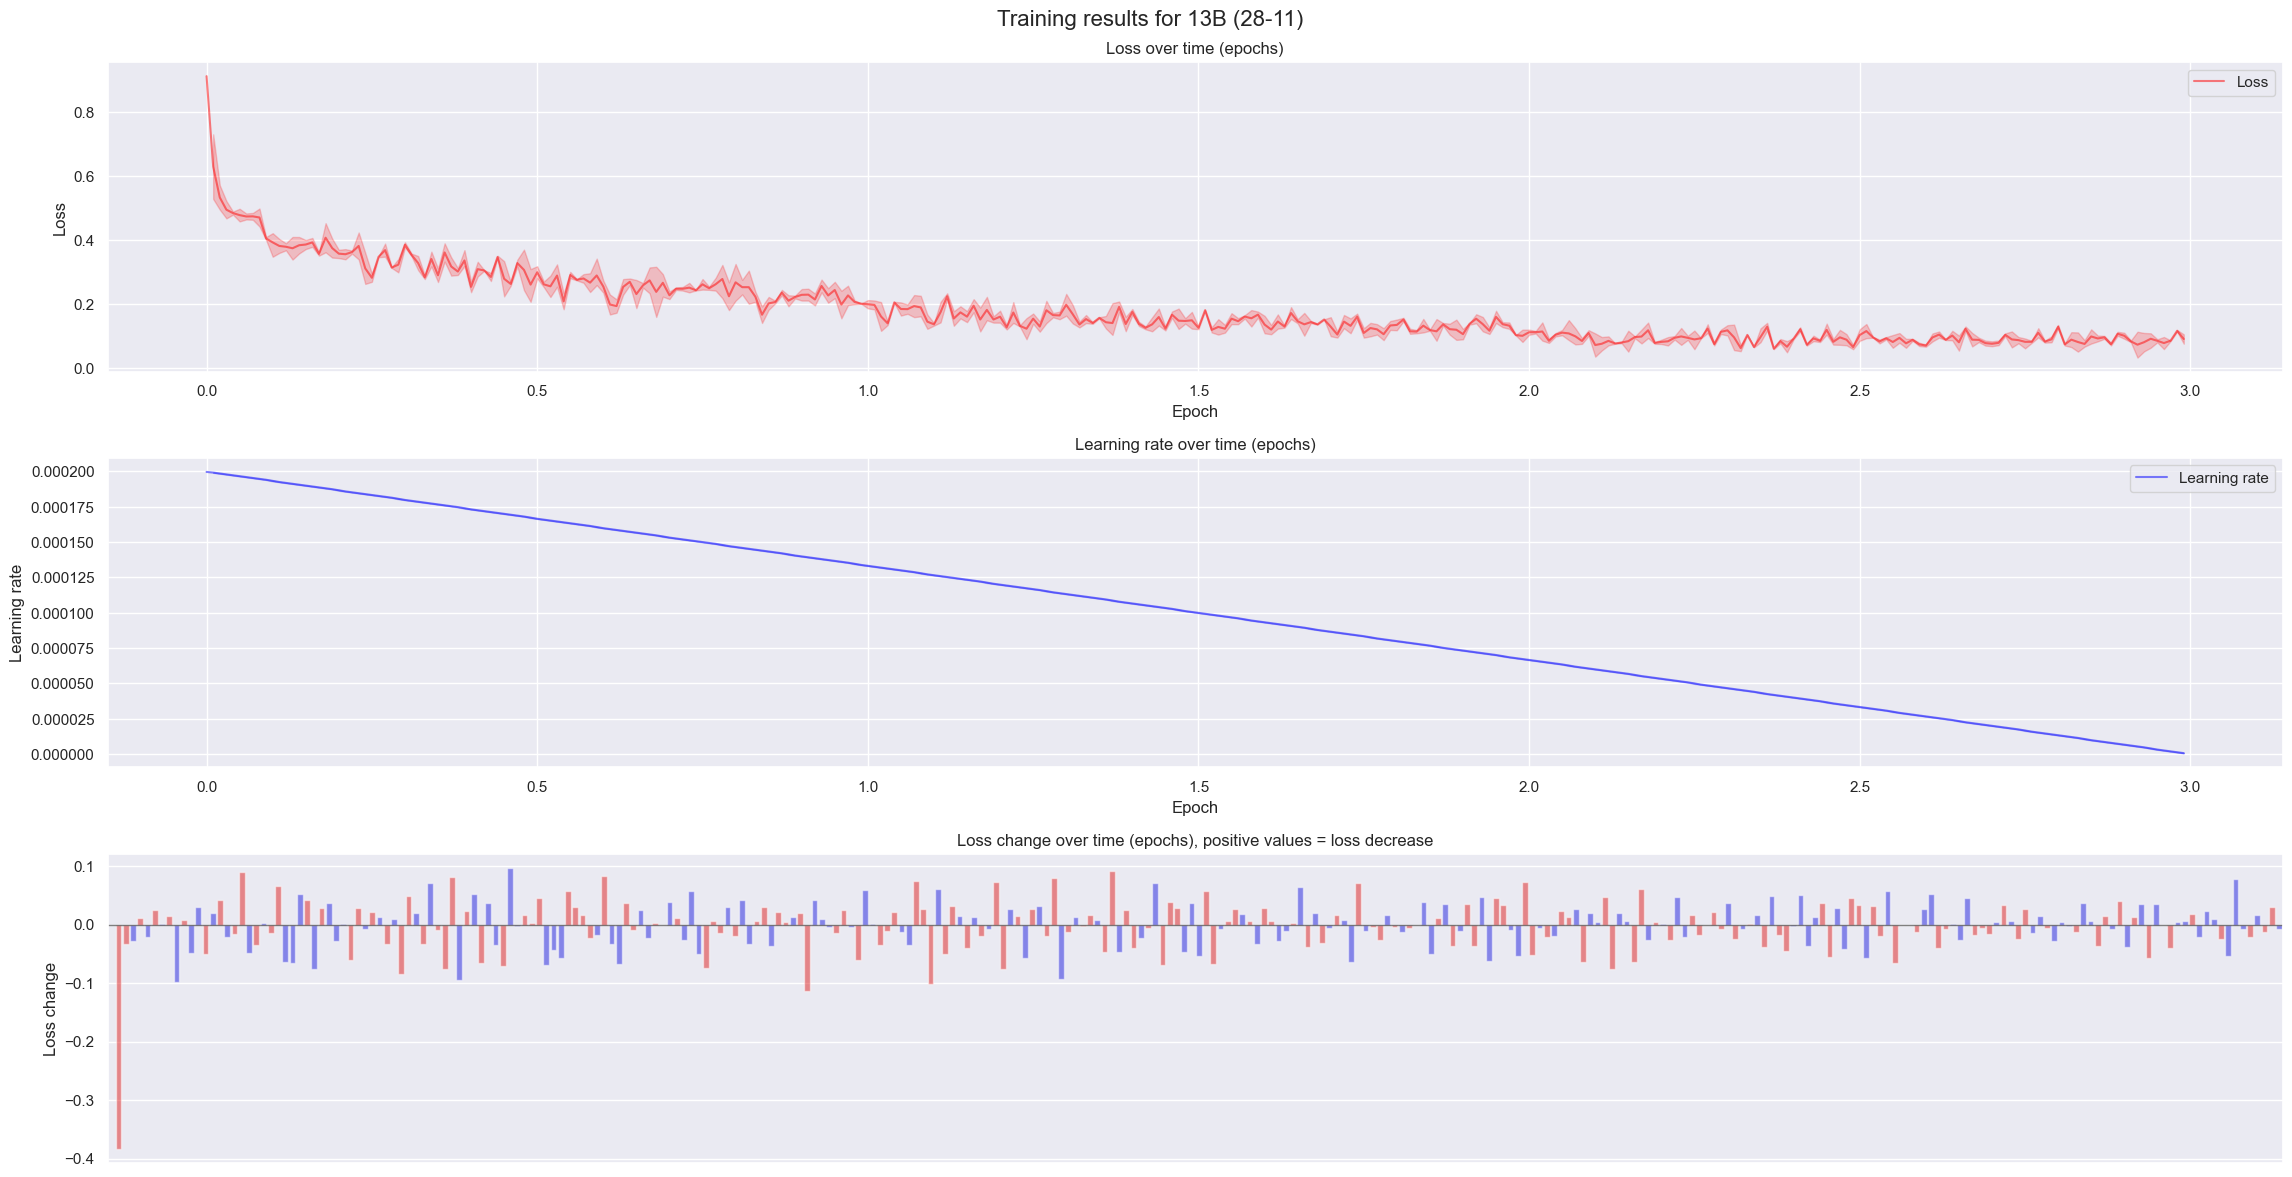

/var/folders/0t/46569zhs0mng6tbft4v9wks40000gn/T/ipykernel_30596/393593786.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/0t/46569zhs0mng6tbft4v9wks40000gn/T/ipykernel_30596/393593786.py:37: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


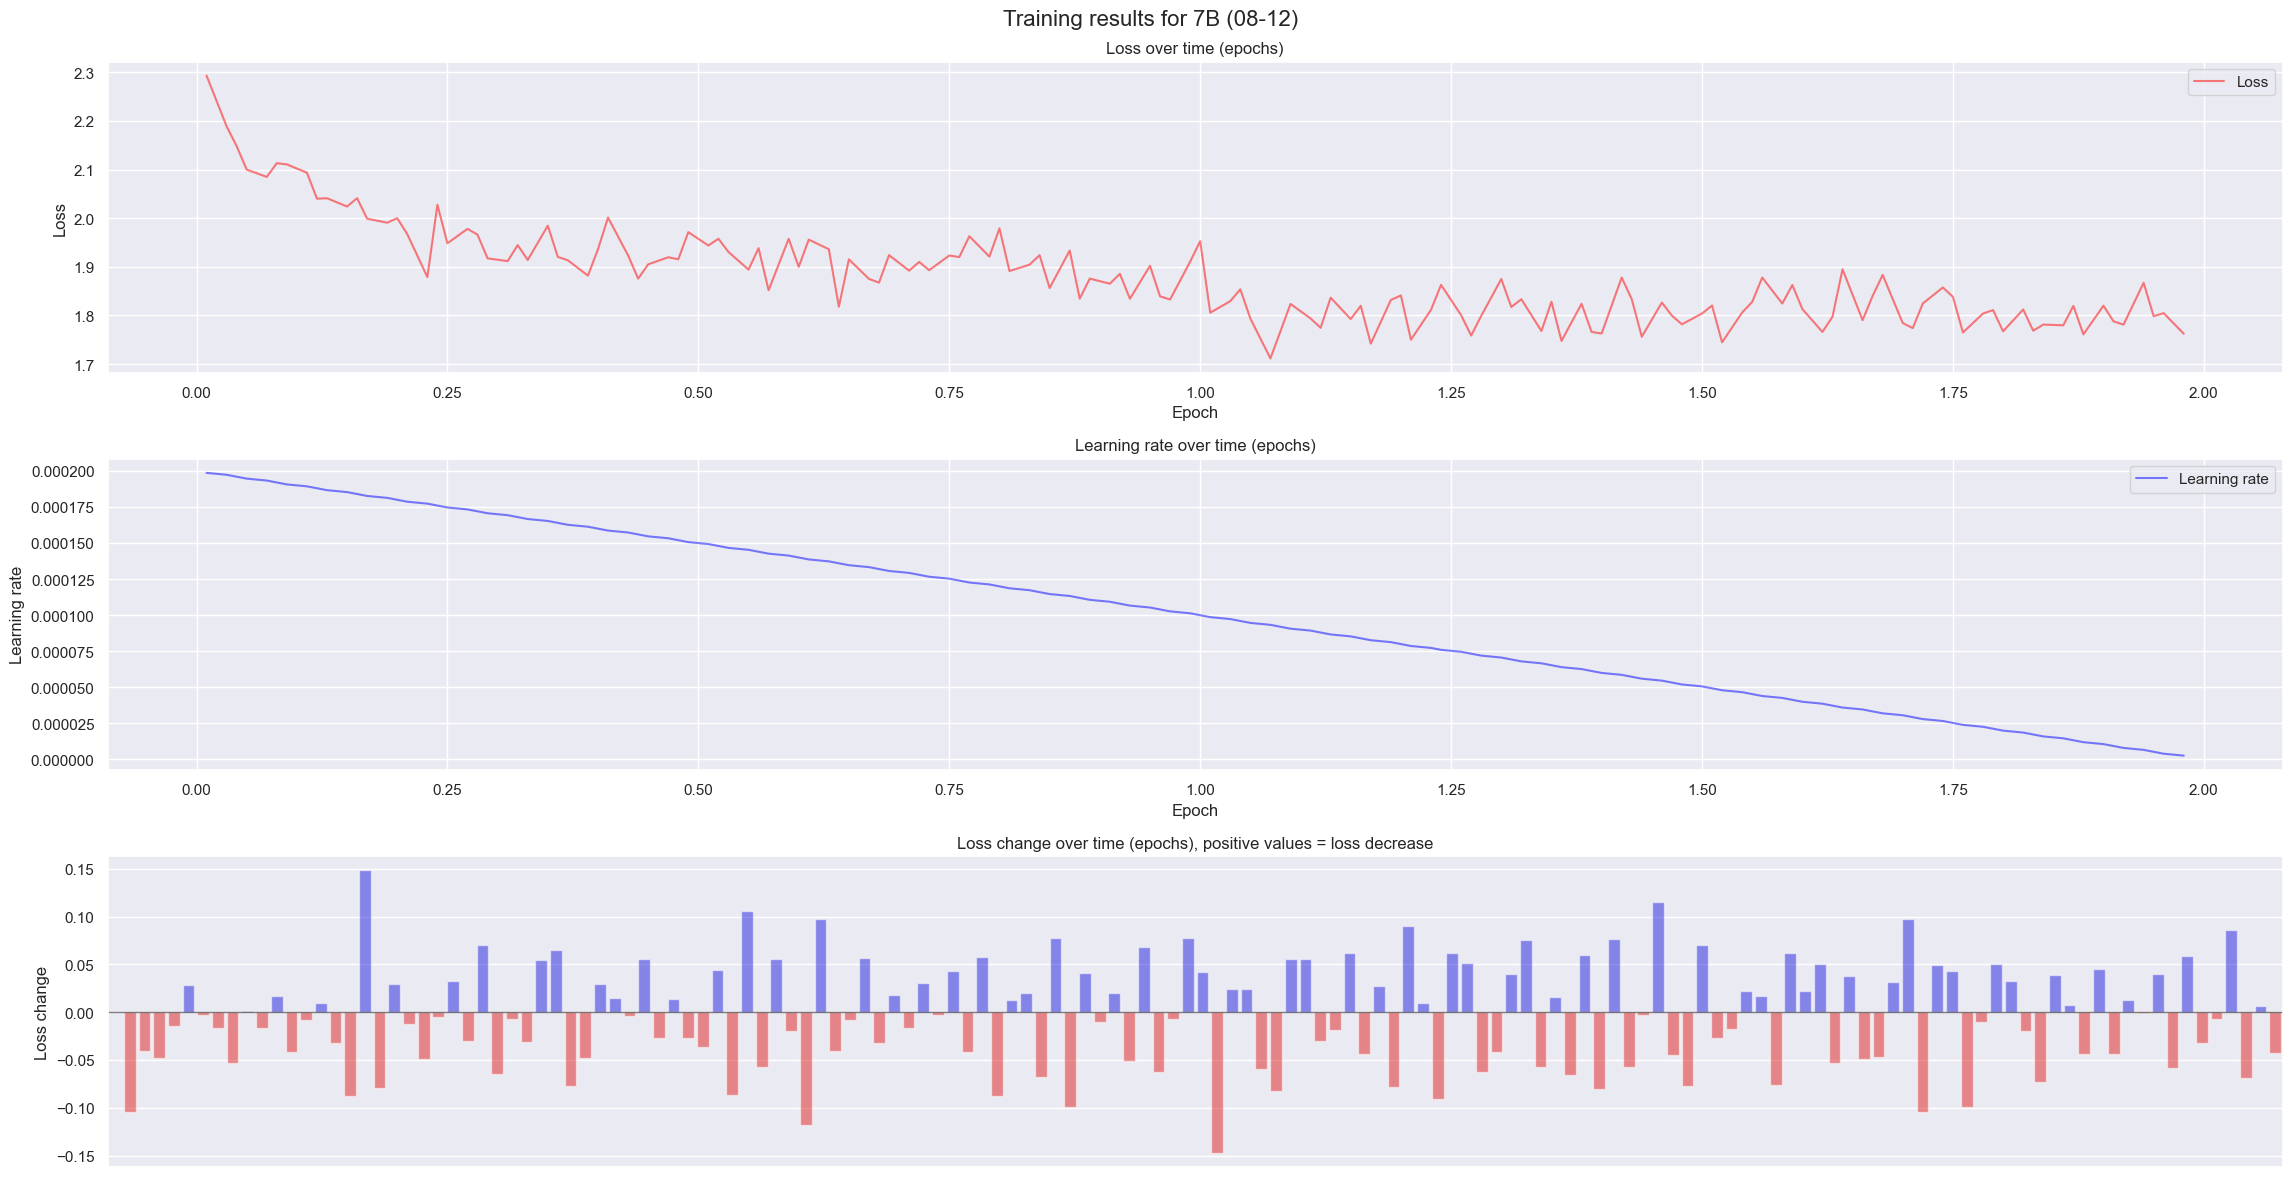

In [6]:
for idx, loss_df in enumerate(logs):
    # training-log-events-7B-08-12-23
    trainings_date = "-".join(log_files[idx].split("-")[-3:-1])
    model_name = log_files[idx].split("-")[3]
    plot_loss(
        process_logs(loss_df), 
        model_name, 
        trainings_date
    )